In [2]:
import xarray as xr
import numpy as np
import scipy as sp
import seastar as ss
import warnings
import os
from _version import __version__
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from _version import __version__
from datetime import datetime

In [3]:
version = 'v20230411'
save_folder=os.path.join('D:\data\SEASTAR\SEASTARex\Data\L1_p','')
#days = ['17','22','25','26']
days = ['17', '22', '25', '26']
flights = ['202205' + d for d in days]
file_paths = ss.utils.readers._set_file_paths()
file_paths['l1c_path'] = "D:\\data\\SEASTAR\\SEASTARex\\Data\\L1c\\"
L1c_path = os.path.join(file_paths['l1c_path'],'')
DAR_tracks = dict()
DAR_tracks['20220517'] = {
    'Track_11': 0,
    'Track_12': 1,
    'Track_13': 2,
    'Track_2': 3,
    'Track_1': 4,
    'Track_1b': 5,
#     'Track_L1': 6,
}
DAR_tracks['20220522'] = {
    'Track_1': 0,
    'Track_2': 1,
    'Track_1b': 2,
    'Track_11': 3,
    'Track_12': 4,
    'Track_13': 5,
    'Track_14': 6,
    'Track_15': 7,
    'Track_16': 8,
    'Track_17': 9,
    'Track_18': 10,
    'Track_2b': 11,
#     'Track_L1': 12,
}
DAR_tracks['20220525'] = {
#     'Track_L1': 0,
    'Track_22a1': 1,
    'Track_22a2': 2,
    'Track_22a3': 3,
    'Track_22a4': 4,
    'Track_22a5': 5,
    'Track_22b': 6,
}
DAR_tracks['20220526'] = {
    'Track_2': 0,
    'Track_1': 1,
    'Track_13': 2,
    'Track_14': 3,
    'Track_11': 4,
    'Track_12': 5,
    'Track_17': 6,
    'Track_18': 7,
    'Track_15': 8,
    'Track_16': 9,
    'Track_2b': 10,
    'Track_1b': 11,
#     'Track_L1': 12,
}

Device name = LIVPCZG-10
Setting local paths...


In [4]:
p_along = 500 #pixel size in metres
p_across = 100
sar_pixel_size = 8
p_along = int(p_along / sar_pixel_size)
p_across = int(p_across / sar_pixel_size)


In [5]:
# for flight in ['20220517']:
for flight in flights:
    print('Processing flight ', flight, '...')
    DAR_list=DAR_tracks[flight]
#     for track in ['Track_2']:
    for track in DAR_list.keys():
        print('Processing track',track,'...')
        ds_L1c = xr.open_dataset(file_paths['l1c_path'] + flight + '_' + track + '_OSCAR_L1c.nc')
        gmf = {'doppler':{'name':'mouche12'}, 'nrcs':{'name':'nscat4ds'}}
        #Define level1
        level1 = xr.Dataset({
            'AntennaAzimuthImage':ds_L1c['AntennaAzimuthImage'],
            'IncidenceAngleImage':ds_L1c['IncidenceAngleImage'],
            'Sigma0':ds_L1c['Sigma0'],
            'RSV':ds_L1c['RadialSurfaceVelocity'],
        }
        )
        # Land mask
        for ant in level1.Antenna:
            mask = ss.utils.tools.compute_land_mask_from_GSHHS(level1.Sigma0.sel(Antenna=ant),
                                                  quiet=True)
            for var in level1.data_vars:
                level1[var].loc[dict(Antenna=ant)] =\
                    xr.where(mask==0,level1[var].sel(Antenna=ant),
                             np.NaN)

        ds_L1c = ss.oscar.level1.add_central_electromagnetic_wavenumber(ds_L1c)
        level1 = level1\
        .coarsen(GroundRange=p_across,boundary='trim').mean()\
        .coarsen(CrossRange=p_along,boundary='trim').mean()
        level1['CentralFreq'] = ds_L1c.CentralFreq
        level1['CentralWavenumber'] = ds_L1c.CentralWavenumber
        level1['Polarization'] = xr.DataArray(data=np.full(level1.RSV.shape, 'VV'),
                     coords=level1.RSV.coords,
                     dims=level1.RSV.dims)
        level1['TrackTime'] = ds_L1c.TrackTime
        level1.attrs['Pixel size'] = '100x500m'
        level1.attrs['Codebase'] = 'seastar_project'
        level1.attrs['Repository'] = 'https://github.com/NOC-EO/seastar_project'
        level1.attrs['Code_version'] = __version__
        level1.attrs['Data_version'] = version
        level1.attrs['Comments'] = 'Processed on ' + datetime.today().strftime('%Y%m%d')
        print('Saving to disk...')
        level1.to_netcdf(os.path.join(save_folder, flight + '_' + track +'_OSCAR_L1_p.nc'))

Processing flight  20220517 ...
Processing track Track_11 ...


Possible issue encountered when converting Shape #95 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #95 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #491 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included b

Saving to disk...
Processing track Track_12 ...
Saving to disk...
Processing track Track_13 ...
Saving to disk...
Processing track Track_2 ...
Saving to disk...
Processing track Track_1 ...
Saving to disk...
Processing track Track_1b ...
Saving to disk...
Processing flight  20220522 ...
Processing track Track_1 ...
Saving to disk...
Processing track Track_2 ...
Saving to disk...
Processing track Track_1b ...
Saving to disk...
Processing track Track_11 ...
Saving to disk...
Processing track Track_12 ...
Saving to disk...
Processing track Track_13 ...
Saving to disk...
Processing track Track_14 ...
Saving to disk...
Processing track Track_15 ...
Saving to disk...
Processing track Track_16 ...
Saving to disk...
Processing track Track_17 ...
Saving to disk...
Processing track Track_18 ...
Saving to disk...
Processing track Track_2b ...
Saving to disk...
Processing flight  20220525 ...
Processing track Track_22a1 ...
Saving to disk...
Processing track Track_22a2 ...
Saving to disk...
Proces

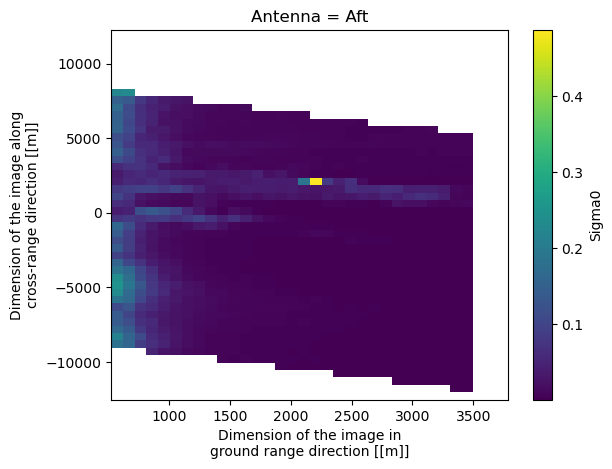

In [31]:
level1.Sigma0.sel(Antenna='Aft').plot()

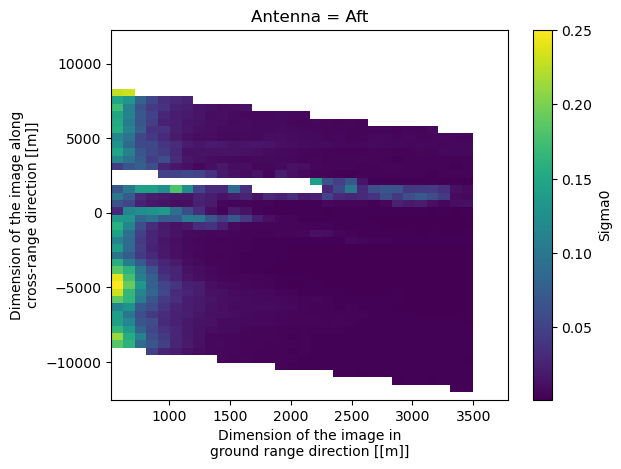

In [29]:
level1.Sigma0.sel(Antenna='Aft').plot()

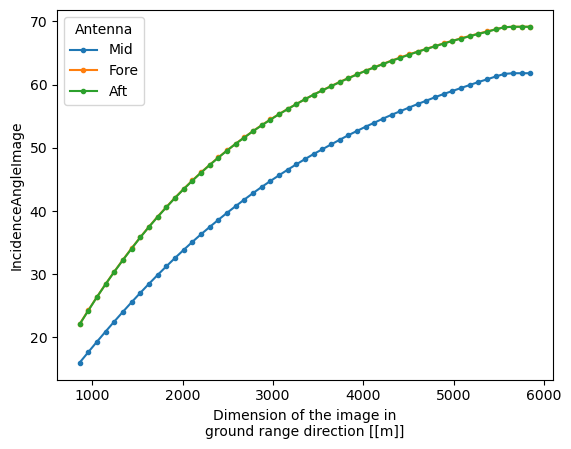

In [7]:
level1.IncidenceAngleImage.median(dim='CrossRange').plot(hue='Antenna',marker='.')

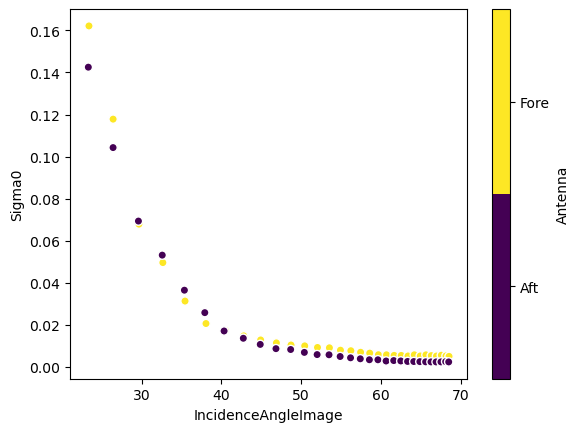

In [5]:
level1.sel(Antenna=['Fore','Aft']).median(dim='CrossRange').plot.scatter(x='IncidenceAngleImage',y='Sigma0',hue='Antenna')

In [45]:
level1.RSV.sel(Antenna='Fore').shape[0] * level1.RSV.sel(Antenna='Fore').shape[1]

1700

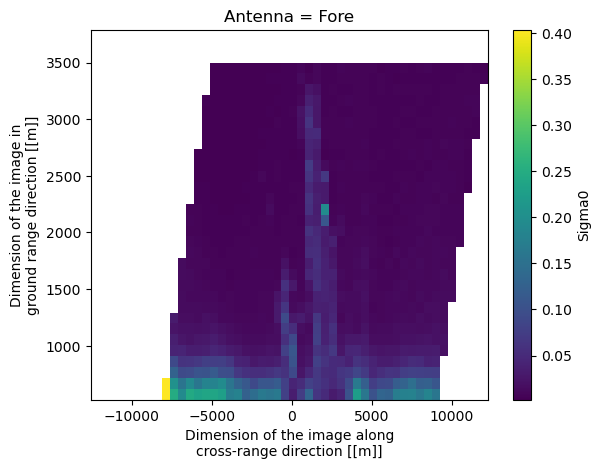

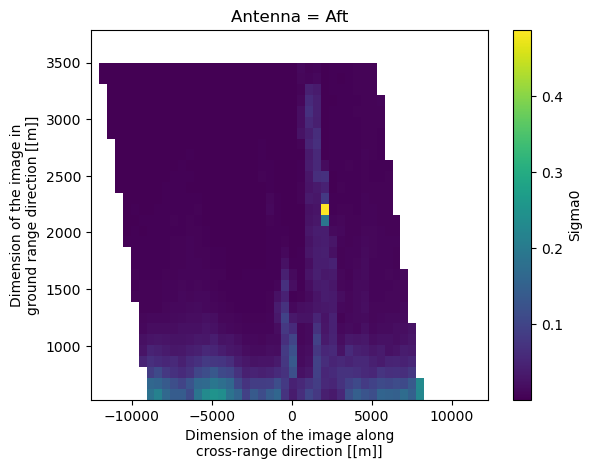

In [6]:
for ant in ['Fore','Aft']:
    level1.Sigma0.sel(Antenna=ant).plot(x='CrossRange', y='GroundRange')
    plt.show()

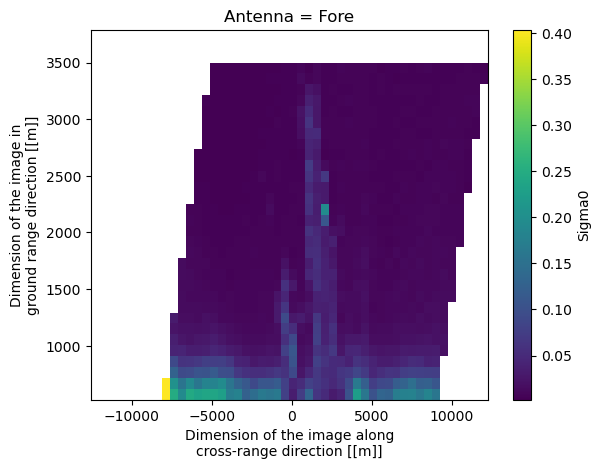

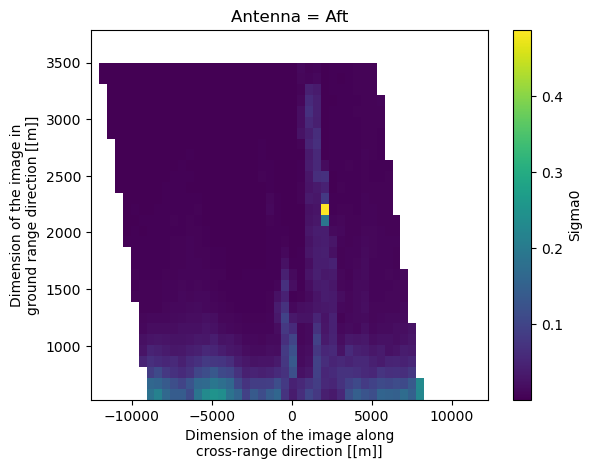

In [7]:
for ant in ['Fore','Aft']:
    level1.Sigma0.sel(Antenna=ant).plot(x='CrossRange', y='GroundRange')
    plt.show()

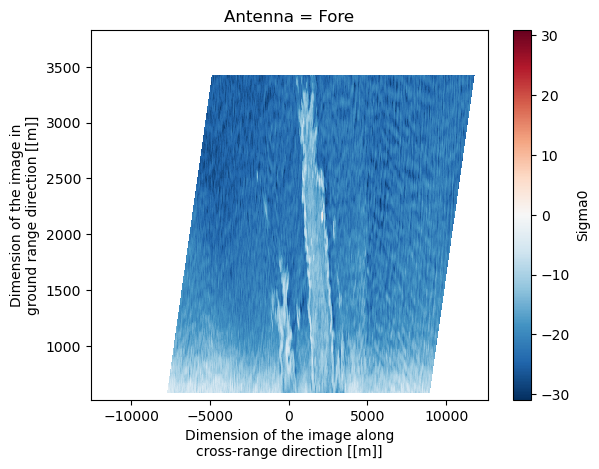

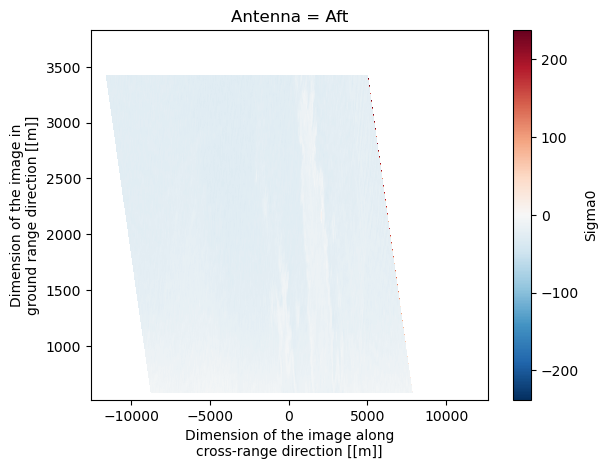

In [16]:
for ant in ['Fore','Aft']:
    ss.utils.tools.lin2db(ds_L1c.Sigma0.sel(Antenna=ant)).plot(x='CrossRange', y='GroundRange')
    plt.show()

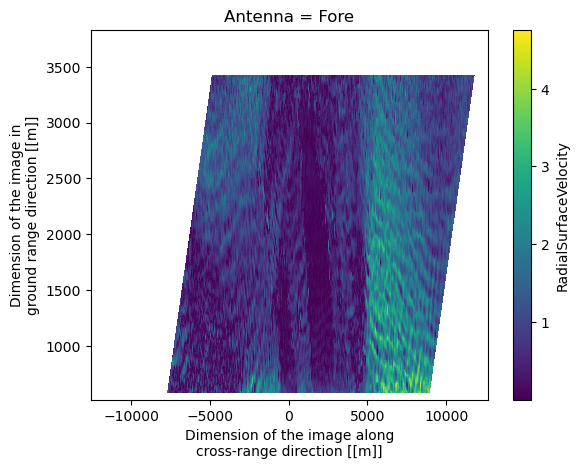

In [83]:
np.sqrt(ds_L1c.RadialSurfaceVelocity.sel(Antenna='Fore') **2 + ds_L1c.RadialSurfaceVelocity.sel(Antenna='Fore') **2).plot(
x='CrossRange', y='GroundRange')

In [94]:
from scipy.ndimage import binary_erosion as erode

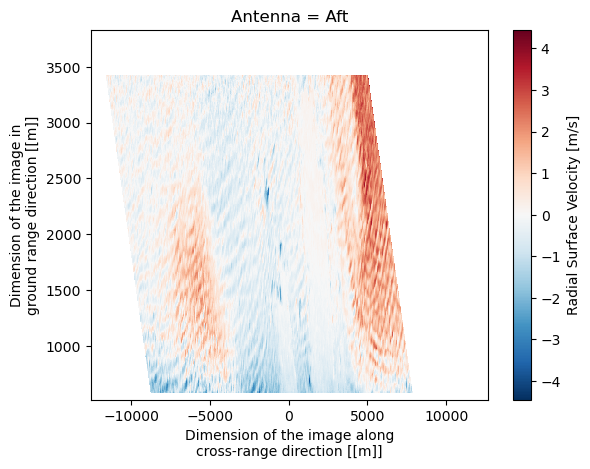

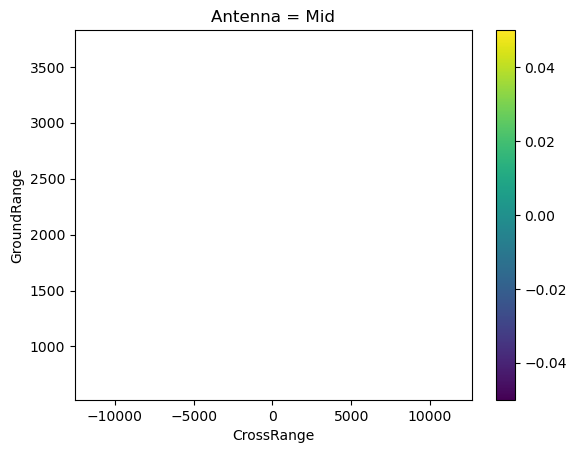

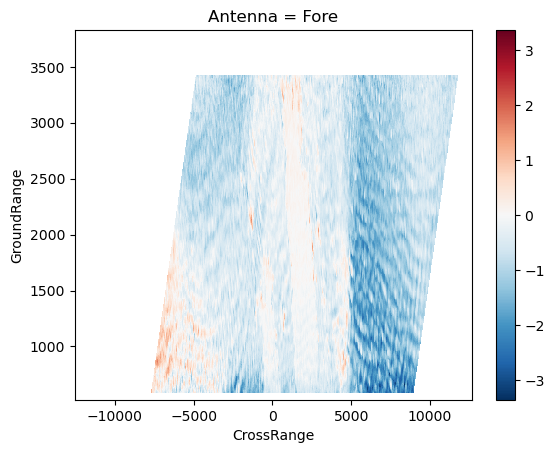

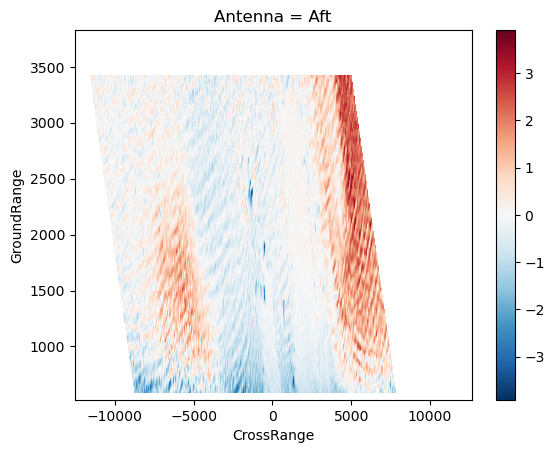

In [117]:
ds_L1c.RadialSurfaceVelocity.sel(Antenna='Aft').plot(
x='CrossRange', y='GroundRange')
plt.show()

mask = ds_L1c.IncidenceAngleImage > 0
for ant in mask.Antenna:
    mask.loc[dict(Antenna=ant)] = erode(mask.sel(Antenna=ant), iterations=2)
    xr.where(mask.sel(Antenna=ant),
        ds_L1c.RadialSurfaceVelocity.sel(Antenna=ant),
         np.NaN,
            ).plot(x='CrossRange', y='GroundRange')
    plt.show()


In [ ]:
mask = xr.where(ds_L2[track].CurrentVelocity>0,True,False)
xr.where(erode(mask, iterations=2), ds_L2[track].CurrentVelocity, np.nan).plot()

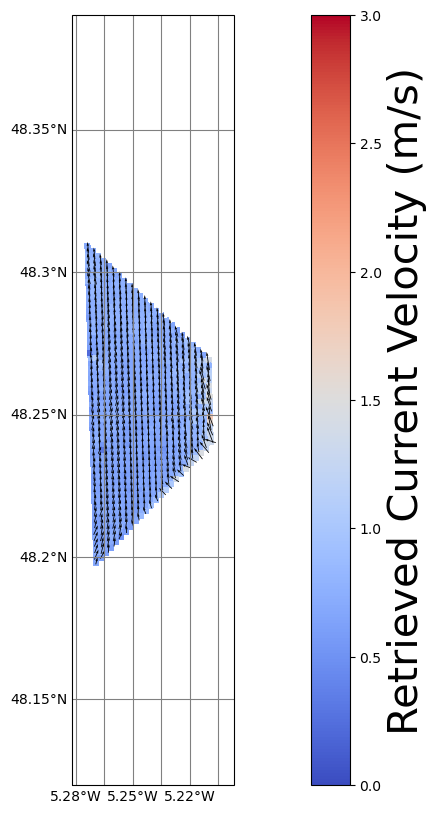

In [102]:

tracktime = str(np.datetime64(ds_L1c.sel(Antenna='Mid').TrackTime.data,'m'))
plot_pixel_size = 200 #pixel size in metres
sar_pixel_size = 8
c_factor_image = int(plot_pixel_size / sar_pixel_size)
q_factor = 30 # Quiver plot scaling factor
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator(), frameon=True)
im=ds_L2\
.coarsen(GroundRange=c_factor_image,boundary='trim').mean()\
.coarsen(CrossRange=c_factor_image,boundary='trim').mean()\
.CurrentVelocity\
.plot(
    y='latitude',
    x='longitude',
    robust=True, 
    cmap='coolwarm',
    vmin=0, vmax=3,
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
)
ds_L2\
.coarsen(GroundRange=q_factor,boundary='trim').mean()\
.coarsen(CrossRange=q_factor,boundary='trim').mean()\
.plot.quiver(
    x='longitude',
    y='latitude',
    u='CurrentVectorUComponent',
    v='CurrentVectorVComponent',
    scale=10,
    width=0.005,
    #angles='xy',
    robust=True,
    transform=ccrs.PlateCarree()
)
gl=ax.gridlines(draw_labels=True, color='gray')
gl.top_labels=False
gl.right_labels=False
# ax.set_extent([-5.2, -5.025, 48.37, 48.52], crs=ccrs.PlateCarree())
#ax.set_extent([-5.175, -5.115, 48.39, 48.45], crs=ccrs.PlateCarree())
cbar = plt.colorbar(im)
cbar.set_label('Retrieved Current Velocity (m/s)',fontsize=30)
#plt.plot(-5.13305, 48.4166, marker="^", color='r', markersize=15, transform=ccrs.PlateCarree())

In [194]:
plot_pixel_size = 500 #pixel size in metres
sar_pixel_size = 8
c_factor = int(plot_pixel_size / sar_pixel_size)

gmf = {'doppler':{'name':'mouche12'}, 'nrcs':{'name':'nscat4ds'}}
#Define level1
level1 = xr.Dataset({
    'AntennaAzimuthImage':ds_L1c['AntennaAzimuthImage'],
    'IncidenceAngleImage':ds_L1c['IncidenceAngleImage'],
    'Sigma0':ds_L1c['Sigma0'],
    'RSV':-ds_L1c['RadialSurfaceVelocity'],
}
)
ds_L1c = ss.oscar.level1.add_central_electromagnetic_wavenumber(ds_L1c)
level1 = level1\
.coarsen(GroundRange=c_factor,boundary='trim').mean()\
.coarsen(CrossRange=c_factor,boundary='trim').mean()
level1['CentralFreq'] = ds_L1c.CentralFreq
level1['CentralWavenumber'] = ds_L1c.CentralWavenumber
level1['Polarization'] = xr.DataArray(data=np.full(level1.RSV.shape, 'VV'),
             coords=level1.RSV.coords,
             dims=level1.RSV.dims)

#Define noise
RSV_noise = 0.2
Sigma0_noise = 0.1
uncertainty = xr.Dataset({'RSV':level1.RSV.copy(deep=True),
                   'Kp':level1.Sigma0.copy(deep=True)})
uncertainty['RSV'][:] = RSV_noise
uncertainty['Kp'][:] = Sigma0_noise
uncertainty, noise = ss.performance.scene_generation.uncertainty_fct(level1, uncertainty)
#lmout = ss.retrieval.level2.run_find_minima(level1, noise, gmf)
level1

To Be Done - uncertainty function


<xarray.Dataset>
Dimensions:              (Antenna: 3, CrossRange: 136, GroundRange: 25)
Coordinates:
  * GroundRange          (GroundRange) float64 912.0 1.112e+03 ... 5.712e+03
  * CrossRange           (CrossRange) float64 -1.345e+04 ... 1.355e+04
  * Antenna              (Antenna) <U4 'Mid' 'Fore' 'Aft'
    latitude             (CrossRange, GroundRange) float64 48.38 48.38 ... 48.13
    longitude            (CrossRange, GroundRange) float64 -5.277 ... -5.202
Data variables:
    AntennaAzimuthImage  (Antenna, CrossRange, GroundRange) float64 nan ... nan
    IncidenceAngleImage  (Antenna, CrossRange, GroundRange) float64 nan ... nan
    Sigma0               (Antenna, CrossRange, GroundRange) float64 nan ... nan
    RSV                  (Antenna, CrossRange, GroundRange) float64 nan ... nan
    CentralFreq          (Antenna) float64 1.35e+10 1.35e+10 1.35e+10
    CentralWavenumber    (Antenna) float64 282.9 282.9 282.9
    Polarization         (Antenna, CrossRange, GroundRange) <U2 'VV' ... 'VV'

In [4]:
136*25

3400

In [132]:
ambiguity = {'name':'sort_by_cost'}
sol = ss.retrieval.ambiguity_removal.solve_ambiguity(lmout, ambiguity)
L2_sbc = ss.retrieval.level2.sol2level2(sol)
L2_sbc

<xarray.Dataset>
Dimensions:           (CrossRange: 27, GroundRange: 5, x_variables: 4,
                       Observables: 2, Antenna: 3)
Coordinates:
  * CrossRange        (CrossRange) float64 -1.305e+04 -1.205e+04 ... 1.295e+04
  * GroundRange       (GroundRange) float64 1.312e+03 2.312e+03 ... 5.312e+03
  * x_variables       (x_variables) <U3 'u' 'v' 'c_u' 'c_v'
  * Observables       (Observables) <U6 'sigma0' 'RSV'
  * Antenna           (Antenna) <U4 'Mid' 'Fore' 'Aft'
    fun_variables     (Observables, Antenna) int32 0 1 2 3 4 5
    latitude          (CrossRange, GroundRange) float64 48.37 48.37 ... 48.14
    longitude         (CrossRange, GroundRange) float64 -5.271 -5.257 ... -5.208
Data variables:
    x                 (CrossRange, GroundRange, x_variables) float64 -6.243 ....
    cost              (CrossRange, GroundRange) float64 0.0 0.0 ... 9.934e-23
    CurrentU          (CrossRange, GroundRange) float64 0.0 0.0 ... 0.0 0.6733
    CurrentV          (CrossRange, GroundRange) float64 0.0 0.0 ... 0.0 -0.09036
    WindU             (CrossRange, GroundRange) float64 -6.243 -4.547 ... -1.776
    WindV             (CrossRange, GroundRange) float64 -5.431 -3.574 ... 1.502
    CurrentVelocity   (CrossRange, GroundRange) float64 0.0 0.0 ... 0.0 0.6794
    CurrentDirection  (CrossRange, GroundRange) float64 90.0 90.0 ... 90.0 97.64
    WindSpeed         (CrossRange, GroundRange) float64 8.274 5.783 ... 2.326
    WindDirection     (CrossRange, GroundRange) float64 48.98 51.84 ... 130.2

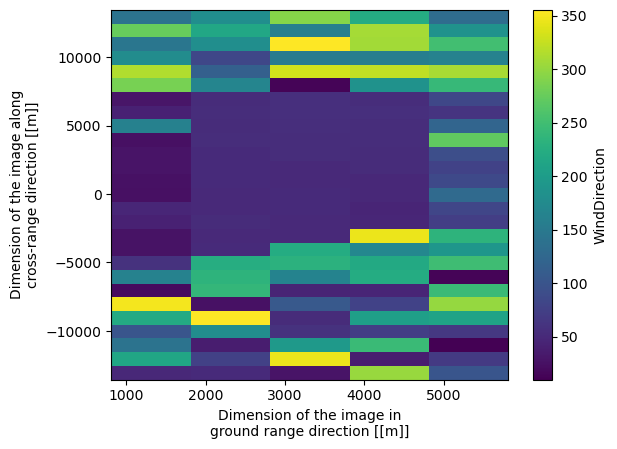

In [137]:
L2_sbc.WindDirection.plot()

In [15]:
beam_mask

<xarray.DataArray 'Sigma0' (CrossRange: 46, GroundRange: 6)>
array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
...
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])
Coordinates:
  * GroundRange  (GroundRange) float64 756.0 1.252e+03 ... 2.74e+03 3.236e+03
  * CrossRange   (CrossRange) float64 -1.115e+04 -1.065e+04 ... 1.117e+04
    latitude     (CrossRange, GroundRange) float64 48.35 48.35 ... 48.15 48.15
    longitude    (CrossRange, GroundRange) float64 -5.278 -5.272 ... -5.236
    Antenna      <U3 'Aft'

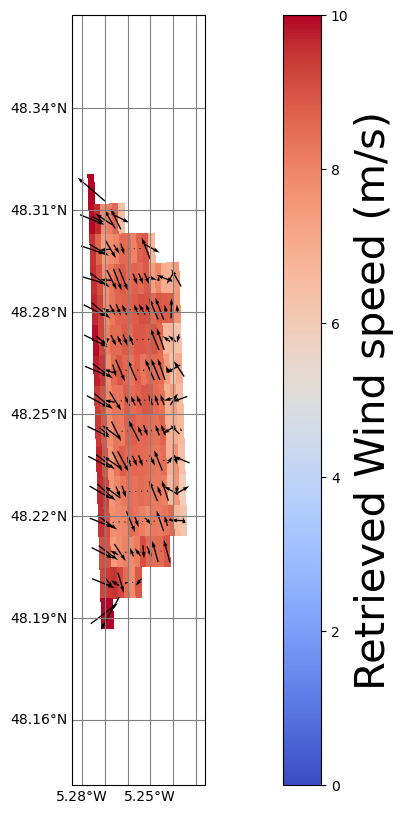

In [72]:
a = [xr.where(np.isnan(level1.sel(Antenna=a).Sigma0),0,1) for a in level1.Antenna.data]
beam_mask = xr.where((a[0] + a[1] + a[2])==3,1,0)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator(), frameon=True)
im=xr.where(beam_mask==1,L2_sbc.WindSpeed,np.nan)\
.coarsen(GroundRange=2,boundary='trim').mean()\
.coarsen(CrossRange=2,boundary='trim').mean()\
.plot(
    y='latitude',
    x='longitude',
    robust=True, 
    cmap='coolwarm',
    vmin=0, vmax=10,
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
)
xr.where(beam_mask==1,L2_sbc,np.nan)\
.coarsen(GroundRange=2,boundary='trim').mean()\
.coarsen(CrossRange=2,boundary='trim').mean()\
.plot.quiver(
    x='longitude',
    y='latitude',
    u='WindU',
    v='WindV',
    scale=50,
    width=0.01,
    #angles='xy',
    robust=True,
    transform=ccrs.PlateCarree()
)
gl=ax.gridlines(draw_labels=True, color='gray')
gl.top_labels=False
gl.right_labels=False
# ax.set_extent([-5.2, -5.025, 48.37, 48.52], crs=ccrs.PlateCarree())
#ax.set_extent([-5.175, -5.115, 48.39, 48.45], crs=ccrs.PlateCarree())
cbar = plt.colorbar(im)
cbar.set_label('Retrieved Wind speed (m/s)',fontsize=30)

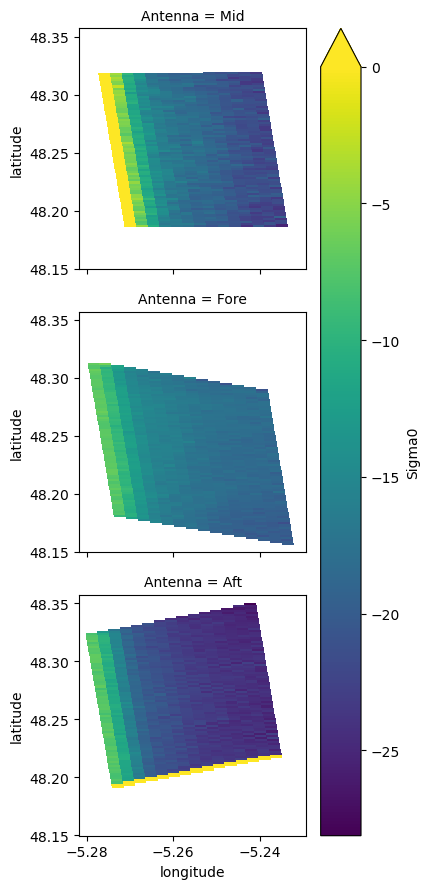

In [17]:
ss.utils.tools.lin2db(level1.Sigma0).plot(x='longitude',y='latitude',row='Antenna',vmax=0)

In [188]:
a = [xr.where(np.isnan(level1.sel(Antenna=a).Sigma0),0,1) for a in level1.Antenna.data]
beam_mask = xr.where((a[0] + a[1] + a[2])==3,1,0)

In [191]:
xr.where(beam_mask==1,L2_sbc,np.nan)

<xarray.Dataset>
Dimensions:           (CrossRange: 27, GroundRange: 5, x_variables: 4,
                       Antenna: 3, Observables: 2)
Coordinates:
  * GroundRange       (GroundRange) float64 1.312e+03 2.312e+03 ... 5.312e+03
  * CrossRange        (CrossRange) float64 -1.305e+04 -1.205e+04 ... 1.295e+04
    latitude          (CrossRange, GroundRange) float64 48.37 48.37 ... 48.14
    longitude         (CrossRange, GroundRange) float64 -5.271 -5.257 ... -5.208
  * Antenna           (Antenna) <U4 'Mid' 'Fore' 'Aft'
  * x_variables       (x_variables) <U3 'u' 'v' 'c_u' 'c_v'
  * Observables       (Observables) <U6 'sigma0' 'RSV'
    fun_variables     (Observables, Antenna) int32 0 1 2 3 4 5
Data variables:
    x                 (CrossRange, GroundRange, x_variables) float64 nan ... nan
    cost              (CrossRange, GroundRange) float64 nan nan nan ... nan nan
    CurrentU          (CrossRange, GroundRange) float64 nan nan nan ... nan nan
    CurrentV          (CrossRange, GroundRange) float64 nan nan nan ... nan nan
    WindU             (CrossRange, GroundRange) float64 nan nan nan ... nan nan
    WindV             (CrossRange, GroundRange) float64 nan nan nan ... nan nan
    CurrentVelocity   (CrossRange, GroundRange) float64 nan nan nan ... nan nan
    CurrentDirection  (CrossRange, GroundRange) float64 nan nan nan ... nan nan
    WindSpeed         (CrossRange, GroundRange) float64 nan nan nan ... nan nan
    WindDirection     (CrossRange, GroundRange) float64 nan nan nan ... nan nan

In [14]:
level1 = xr.open_dataset('D:\\data\\SEASTAR\\SEASTARex\\Data\\L1_p\\20220522_Track_11_OSCAR_L1_p.nc')
#lmout = xr.open_dataset('D:\\data\\SEASTAR\\SEASTARex\\Data\\L2\\200m\\20220517_Track_11_lmout.nc')
#lmout = xr.open_dataset('Z:\\data\\airborne\\OSCAR\\L2\\100x500m\\20220517_Track_11_100x500m_mouche12_lmout.nc')

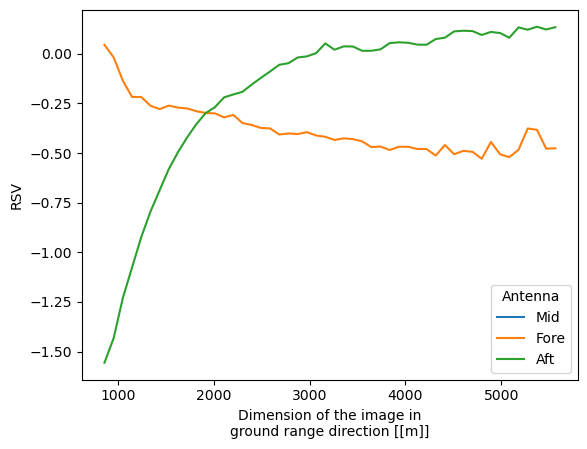

In [15]:
level1.RSV.median(dim='CrossRange').plot(hue='Antenna')

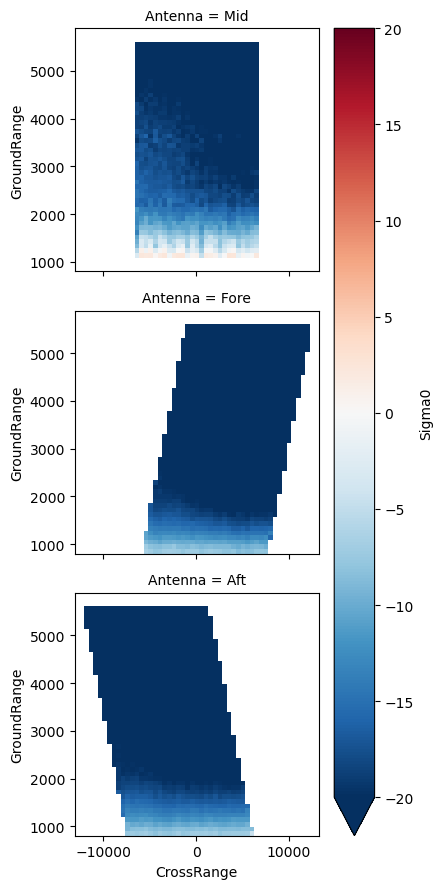

In [6]:
ss.utils.tools.lin2db(level1.Sigma0).plot(row='Antenna',x='CrossRange',y='GroundRange',
                                         vmax=20)

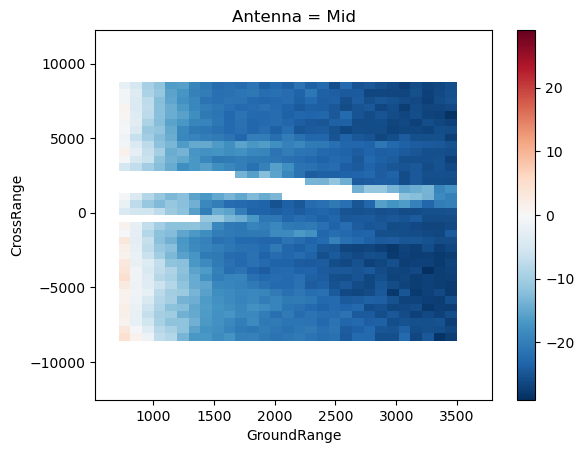

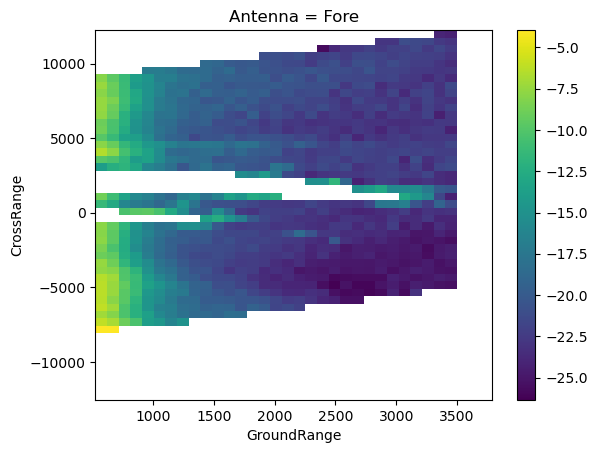

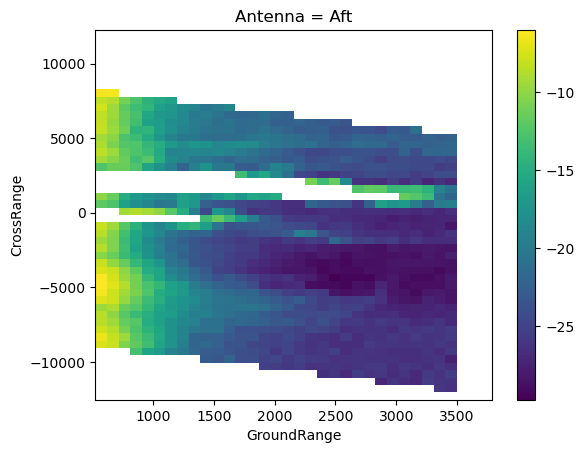

In [22]:
for ant in level1.Antenna:
    mask = ss.utils.tools.compute_land_mask_from_GSHHS(level1.Sigma0.sel(Antenna=ant),
                                                  quiet=True)
    ss.utils.tools.lin2db(xr.where(mask==0,level1.Sigma0.sel(Antenna=ant),np.NaN)).plot()
    plt.show()

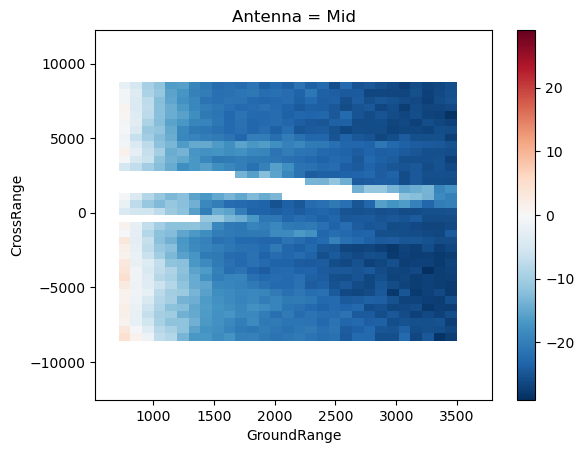

In [71]:
ambiguity = {'name':'sort_by_cost'}
sol = ss.retrieval.ambiguity_removal.solve_ambiguity(lmout, ambiguity)
L2_sbc = ss.retrieval.level2.sol2level2(sol)


In [ ]:
folder = 'restricted'
data_type = 'METEOFRANCE_AROME'
AROME_data_folder = os.path.join(file_paths['aux_path'], folder, data_type,'')

AROME_dict = dict()
AROME_file_list = os.listdir(AROME_data_folder)
for file in AROME_file_list:
    AROME_dict[AROME_file_list.index(file)] =\
    xr.open_dataset(AROME_data_folder + file)

AROME_winds = xr.concat(list(AROME_dict.values()),
                        dim='time',
                       join='outer')
u10 = AROME_winds.u10m.interp(time=ds_L1c[track].sel(Antenna='Mid').TrackTime,method='nearest')\
        .interp(latitude=ds_L1c[track].latitude.median(), method='nearest')\
        .interp(longitude=ds_L1c[track].longitude.median(), method='nearest')
    v10 = AROME_winds.v10m.interp(time=ds_L1c[track].sel(Antenna='Mid').TrackTime,method='nearest')\
        .interp(latitude=ds_L1c[track].latitude.median(), method='nearest')\
        .interp(longitude=ds_L1c[track].longitude.median(), method='nearest')

In [ ]:

below boundary
{'x0': array([-30.39007865,   2.07549814,  -1.55730345,   2.1326858 ])}
{'vis_wspd': <xarray.DataArray 'x' ()>
array(28.83283192), 'vis_wdir': 89.88635823171711, 'vis_u': <xarray.DataArray 'x' ()>
array(-28.8327752), 'vis_v': <xarray.DataArray 'x' ()>
array(-0.05718767), 'c_u': <xarray.DataArray 'x' ()>
array(-1.55730345)
Coordinates:
    x_variables  <U3 'c_u', 'c_v': <xarray.DataArray 'x' ()>
array(2.1326858)
Coordinates:
    x_variables  <U3 'c_v', 'u': <xarray.DataArray 'x' ()>
array(-30.39007865)
Coordinates:
    x_variables  <U3 'c_u', 'v': <xarray.DataArray 'x' ()>
array(2.07549814)
Coordinates:
    x_variables  <U3 'c_v'}
above boundary
{'x0': array([-0.5167464 , 32.29768281, -0.45955874,  3.4649076 ])} {'vis_wspd': <xarray.DataArray 'x' ()>
array(28.83283192), 'vis_wdir': 179.88635823171717, 'vis_u': <xarray.DataArray 'x' ()>
array(-0.05718767), 'vis_v': <xarray.DataArray 'x' ()>
array(28.8327752), 'c_u': <xarray.DataArray 'x' ()>
array(-0.45955874)
Coordinates:
    x_variables  <U3 'c_u', 'c_v': <xarray.DataArray 'x' ()>
array(3.4649076)
Coordinates:
    x_variables  <U3 'c_v', 'u': <xarray.DataArray 'x' ()>
array(-0.5167464)
Coordinates:
    x_variables  <U3 'c_u', 'v': <xarray.DataArray 'x' ()>
array(32.29768281)
Coordinates:
    x_variables  <U3 'c_v'}
